# SCIMPLE 1.10.6 examples of use

add lib to `PYTHON_PATH`

In [3]:
import sys
sys.path.append('c:/Prog/Python/Scimple/')

or
`pip install scimple`

## PySpark

In [2]:
from scimple import pyspark_contexts
sc, sqlc = pyspark_contexts()  # Creates SparkContext and SQLContext
sc

using scimple 1.10.6_


<SparkContext master=local[*] appName=pyspark-shell>

##### Word Count on a scimple source file:

In [14]:
import re
word_count = sc.textFile('scimple/plot.py').flatMap(lambda line: re.split(r' |:|,|\n|\t|\(|\)|\{|\}|\[|\]|"|\'', line))\
               .filter(lambda word: len(word)!=0)\
               .map(lambda word: (word, 1))\
               .reduceByKey(lambda a,b: a+b).sortBy(lambda pair: pair[1]).collect()

##### Data Viz:
(more in 'Plot' section)

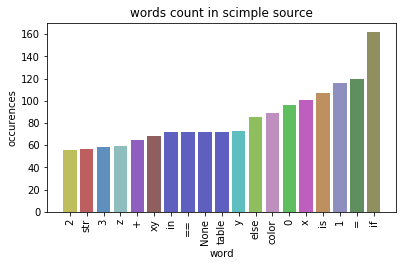

In [15]:
from scimple import Plot
%matplotlib inline
Plot(title='words count in scimple source', xlabel='word', ylabel='occurences')\
    .add(word_count[-20:-1], 0, 1, marker='bar', colored_by=1, label=None)

## Kafka / PySpark Streaming

In [10]:
from scimple import kafka

In [20]:
kafka.start_server(window=5)

Kafka server started


In [21]:
dstream = kafka.create_dstream('readme_lines')

In [22]:
rdd_buff = list()
dstream.foreachRDD(lambda rdd: rdd_buff.append(rdd.collect()))

In [23]:
kafka.start_listening()

StreamingContext started


In [24]:
import time
for line in open('README.md', 'r').read().split('\n'):
    print(line)
    kafka.talk('readme_lines', line)

# Scimple Lib

#####Kafka & Spark & Stat & Plot your data scimply

github.com/EnzoBnl/Scimple

Enzo Bonnal
enzobonnal@gmail.com

TEST:

Test package by running: 
`pip install scimple`

or:
`git clone https://github.com/EnzoBnl/Scimple`
and
`pip install .`

Then run the test notebook


In [25]:
kafka.flush()

In [26]:
kafka.stop_listening()

StreamingContext closed


In [27]:
kafka.stop_server()

Kafka server ended


In [28]:
from scimple.utils import flatten_n_times
print('\n'.join([key_value[1] for key_value in flatten_n_times(1,rdd_buff)]))

# Scimple Lib
#####Kafka & Spark & Stat & Plot your data scimply

github.com/EnzoBnl/Scimple

Enzo Bonnal
enzobonnal@gmail.com

TEST:

Test package by running: 
`pip install scimple`

or:
`git clone https://github.com/EnzoBnl/Scimple`
and
`pip install .`

Then run the test notebook


### Environment to JSON

In [9]:
from scimple import save_environ
name = save_environ()
import os
import json
print(json.load(open(name))['PYTHONPATH'])
os.remove(name)

SUCCESS : Path exported in JSON
c:/Prog/Python/MyLibs;


## Plots

In [17]:
from scimple import Plot, get_sample, xgrid, ygrid
import pandas as pd
import numpy as np
import math
import random

In [18]:
%matplotlib inline

##### Plot a function 

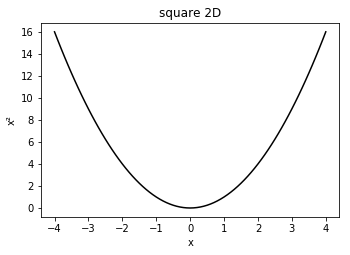

In [30]:
Plot(title='square 2D', xlabel='x', ylabel='x²').add(x=np.arange(-4,4.1,0.1),
                                                     y=lambda i, x: x[i]**2,
                                                     marker='-',
                                                     colored_by='#000000')

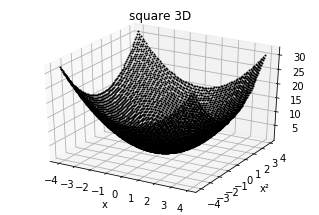

In [31]:
Plot(dim=3, title='square 3D', xlabel='x', ylabel='x²').add(x=xgrid(-4,4,0.1),
                                                            y=ygrid(-4,4,0.1),
                                                            z=lambda i, x, y: x[i]**2 + y[i]**2,
                                                            markersize=2,
                                                            colored_by='#000000')

##### `colored_by` parameter possibilities

In [69]:
steps = [[i,i//2] for i in range(20)]

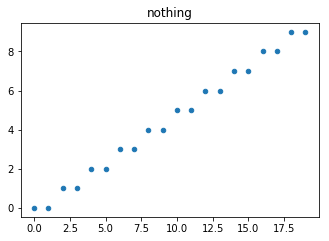

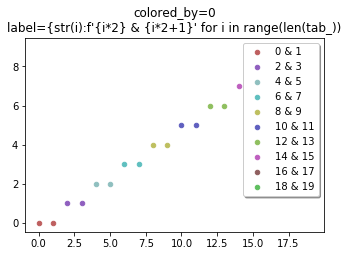

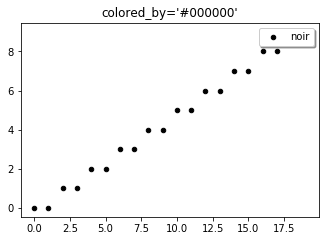

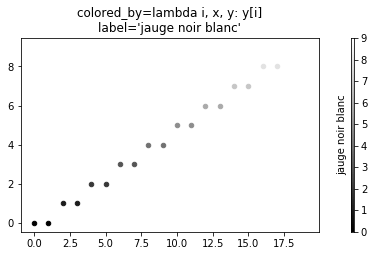

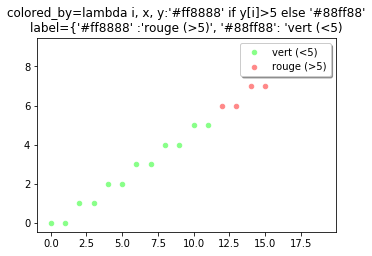

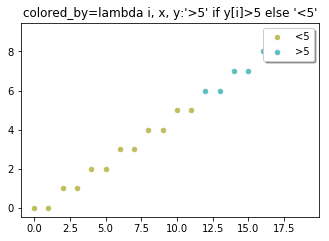

In [71]:
Plot(title="nothing").add(steps, 0, 1)

Plot(title="colored_by=0\nlabel={str(i):f'{i*2} & {i*2+1}' for i in range(len(tab_))")\
    .add(tab_, 0, 1, colored_by=1, label={str(i): f'{i*2} & {i*2+1}' for i in range(len(tab_))})

Plot(title="colored_by='#000000'").add(steps, 0, 1, colored_by='#000000', label="noir")

Plot(title="colored_by=lambda i, x, y: y[i]\nlabel='jauge noir blanc'")\
    .add(steps, 0, 1, colored_by=lambda i, x, y: y[i], label="jauge noir blanc")
    
Plot(title="colored_by=lambda i, x, y:'#ff8888' if y[i]>5 else '#88ff88'\n"
           "label={'#ff8888' :'rouge (>5)', '#88ff88': 'vert (<5)")\
    .add(steps, 0, 1, colored_by=lambda i, x, y:'#ff8888' if y[i]>5 else '#88ff88',
         label={'#ff8888' :"rouge (>5)", '#88ff88': "vert (<5)"})
    
Plot(title="colored_by=lambda i, x, y:'>5' if y[i]>5 else '<5'")\
    .add(steps, 0, 1, colored_by=lambda i, x, y:'>5' if y[i]>5 else '<5')

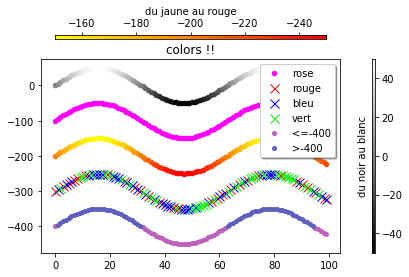

In [73]:
Plot(title='colors !!').add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10),
                        marker='.', colored_by=lambda i, x, y: y[i], label='du noir au blanc') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 100,
         marker='.', colored_by='#ff00ff', label='rose') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 200,
         marker='.', colored_by=lambda i, x, y: y[i], label='du jaune au rouge') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 300,
         marker='x', colored_by=lambda i, x, y: ['#ff0000', '#00ff00', '#0000ff'][int(y[i]) % 3],
         label={'#ff0000': 'rouge', '#00ff00': 'vert', '#0000ff': 'bleu'}) \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 400,
         marker='.', markersize=8,
         colored_by=lambda i, x, y: '>-400' if y[i] > -400 else '<=-400')

##### Some plays with molecules

In [74]:
tab = get_sample('xyz', pd.DataFrame)
tab.columns=['atom', 'x', 'y', 'z']
charges = get_sample('charges', pd.DataFrame)

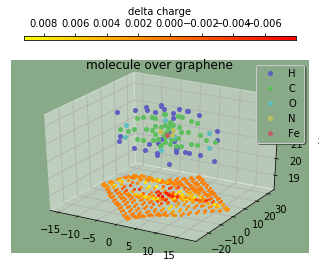

In [75]:
Plot(3, zlabel='z', bg_color='#88aa88', title="molecule over graphene").magic('invert_color_bars') \
    .add(tab, 'x', 'y', 'z', first_line=101, markersize=4, marker='.',
         colored_by=lambda i, x, y, z: sum(charges.loc[101 + i,:])-4, label='delta charge') \
    .add(tab, 'x', 'y', 'z', last_line=100
         , markersize=4, marker='o', colored_by='atom')

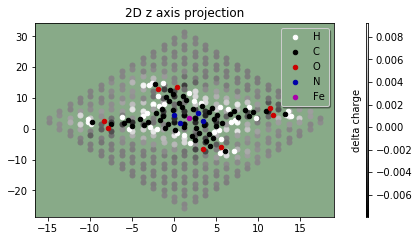

In [76]:
dict_atoms_colors={'H': '#ffffff', 'C':'#000000', 'N':'#0000aa', 'O':'#cc0000', 'Fe':'#aa00aa'}
dict_colors_atoms={c: a for a, c in dict_atoms_colors.items()}
Plot(2, bg_color='#88aa88', title="2D z axis projection") \
    .add(tab, 'x', 'y', first_line=101, markersize=10, marker='.',
         colored_by=lambda i, x, y: sum(charges.loc[101 + i,:])-4, label='delta charge')\
    .add(tab, 'x', 'y', last_line=100, colored_by=lambda i, x, y: dict_atoms_colors[tab['atom'][i]], marker='.',
        label=dict_colors_atoms)

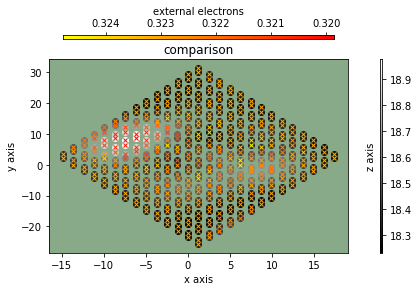

In [77]:
Plot(2, bg_color='#88aa88', xlabel="x axis", ylabel="y axis", title="comparison") \
    .add(tab, 'x', 'y', first_line=101, markersize=6, marker='o',
         colored_by=lambda i, x, y: tab['z'][101 + i],
         label="z axis") \
    .add(tab, 'x', 'y', first_line=101, markersize=4, marker='x',
         colored_by=lambda i, x, y: charges.loc[101 + i, 2],
         label="external electrons")

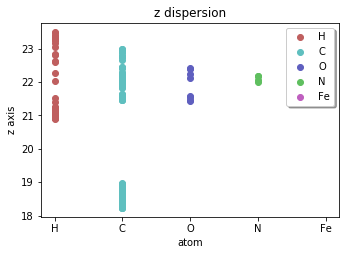

In [78]:
Plot(2, xlabel="atom", ylabel="z axis", title="z dispersion") \
    .add(tab, 'atom', 'z', markersize=6, marker='o', colored_by='atom')

##### again some `colored_by` demo, this time in 3D

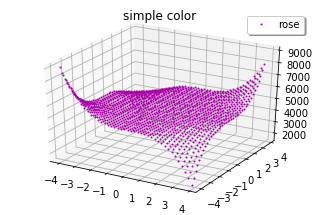

In [80]:
Plot(3, title='simple color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 + 5000,
         marker='.', colored_by='#aa00aa', label='rose', markersize=2) 

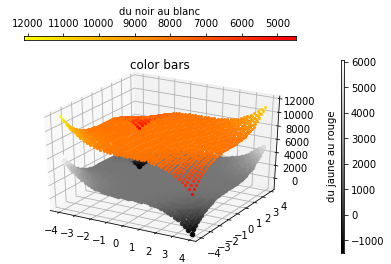

In [81]:
Plot(3, title='color bars')\
    .add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 + 2000,
         marker='.', colored_by=lambda i, x, y, z: z[i], label='du jaune au rouge') \
    .add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2),
         z=lambda i, x, y: (x[i] * y[i]) ** 3 + 8000,
         marker='o', colored_by=lambda i, x, y, z: z[i],
         label='du noir au blanc', markersize=2) 

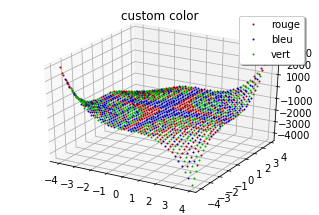

In [82]:
Plot(3, title='custom color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 - 1000,
         marker='.', colored_by=lambda i, x, y, z: ['#aa0000', '#00aa00', '#0000aa'][int(z[i]) % 3],
         label={'#aa0000': 'rouge', '#00aa00': 'vert', '#0000aa': 'bleu'}, markersize=2) 

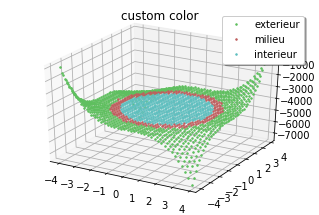

In [83]:
Plot(3, title='custom color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 - 4000,
         marker='.', markersize=3,
         colored_by=lambda i, x, y, z: 'exterieur' if math.sqrt(x[i] ** 2 + y[i] ** 2) > 3 else 
                                  'milieu' if math.sqrt(x[i] ** 2 + y[i] ** 2) > 2.5 else 
                                  'interieur')

## Stats

In [2]:
from scimple import Serie

In [24]:
s = Serie(np.random.randn(10000), Serie.quantitative_continue)

In [25]:
s.moyenne

-0.001237465473317245

In [26]:
s.quantile_1_48

-2.0028075473255904

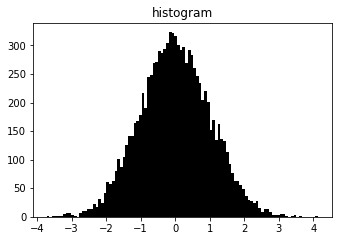

In [33]:
Plot(title='histogram').hist(s.valeurs, 100, color='#000000')


Moyenne=-0.012038159220368314
1er Quartile=-0.6821163291562908
Mediane=-0.012038159220368314
3eme Quartile=0.6786274692472293



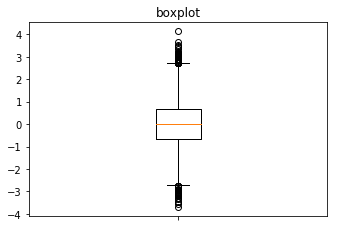

In [28]:
s.description

              n       f
grandeurs              
valeur 0   6757  0.6757
valeur -1  1403  0.1403
valeur 1   1388  0.1388
valeur 2    214  0.0214
valeur -2   192  0.0192
valeur -3    25  0.0025
valeur 3     20  0.0020
valeur 4      1  0.0001

Moyenne=0.0
1er Quartile=0.0
Mediane=0.0
3eme Quartile=0.0



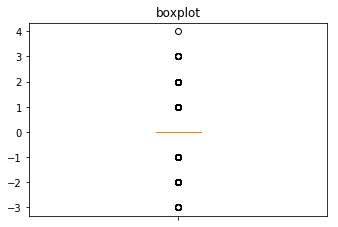

In [29]:
Serie(map(int, s.valeurs), Serie.quantitative_discrete).description